## 6.4 Supervised Machine Learning_Regression

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option configures the environment to display graphs within the notebook automatically, eliminating the need for explicit calls to render them.
%matplotlib inline

In [3]:
# Assign the path of the Gun Violence data folder to the variable 'path'.
path = r'C:\Users\ramis\OneDrive\JC\Data Analytics Course\Data Analytics Immersion\A6\Gun Violence'

In [4]:
# import clean data gun_violence_c3.pkl
df_gv = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'gun_violence_c3.pkl'))

### 2. Data cleaning
In Exercise 6.3 in Choropleth Map number 1 ("Average Number Killed by Gun Violence") it is clear on the map that southern states (states with lower latitude) tend to have a higher avg number of killed by gun violence. Thus, I will take it from there to explore the relationship between the latitude (independent variable) and the number of killed n_killed as dependent variable. Therefore, my cleaning will be focused on the columns 'latitude' and 'n_killed'

In [5]:
df_gv.head()

incident_id       date           state city_or_county  n_killed  n_injured  \
0       461105 2013-01-01    Pennsylvania     Mckeesport         0          4   
1       460726 2013-01-01      California      Hawthorne         1          3   
2       478855 2013-01-01            Ohio         Lorain         1          3   
3       478925 2013-01-05        Colorado         Aurora         4          0   
4       478959 2013-01-07  North Carolina     Greensboro         2          2   

   congressional_district                           incident_characteristics  \
0                    14.0  Shot - Wounded/Injured||Mass Shooting (4+ vict...   
1                    43.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
2                     9.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
3                     6.0  Shot - Dead (murder, accidental, suicide)||Off...   
4                     6.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   

   latitude  longitude                    participant_age  \
0   40.3467   -79.8559                              0::20   
1   33.9090  -118.3330                              0::20   
2   41.4455   -82.1377  0::25||1::31||2::33||3::34||4::33   
3   39.6518  -104.8020         0::29||1::33||2::56||3::33   
4   36.1140   -79.9569         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type age_group_classification  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...          Known Age Group   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...          Known Age Group   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...          Known Age Group   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...          Known Age Group   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...          Known Age Group   

  severity_of_incident  
0        Mass Shooting  
1        Mass Shooting  
2        Mass Shooting  
3        Mass Shooting  
4        Mass Shooting

In [6]:
df_gv.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'incident_characteristics',
       'latitude', 'longitude', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'age_group_classification', 'severity_of_incident'],
      dtype='object')

In [7]:
df_gv.shape

(239677, 17)

In [8]:
# Count number of missing values in the respective columns 'n_killed' and 'latitude' 
missing_values_n_killed = df_gv['n_killed'].isnull().sum()
missing_values_latitude = df_gv['latitude'].isnull().sum()

missing_values_n_killed, missing_values_latitude

(0, 7923)

In [9]:
# Calculate the total number of rows
total_rows = df_gv.shape[0]

# Calculate the proportion of missing values for 'latitude'
proportion_missing_latitude = missing_values_latitude / total_rows*100

proportion_missing_latitude

3.305698919796226

In [10]:
# Filter the dataframe for missing latitude values
missing_lat_df = df_gv[df_gv['latitude'].isnull()]

# Group by 'state' and 'city_or_county' to find where the missing latitude values are concentrated
missing_lat_locations = missing_lat_df.groupby(['state', 'city_or_county']).size().reset_index(name='missing_lat_count')

missing_lat_locations

state city_or_county  missing_lat_count
0       Alabama      Alabaster                  1
1       Alabama      Andalusia                  1
2       Alabama           Arab                  1
3       Alabama        Ashland                  1
4       Alabama         Athens                  1
...         ...            ...                ...
2364  Wisconsin         Wausau                  1
2365    Wyoming         Casper                  1
2366    Wyoming         Dubois                  1
2367    Wyoming     Evansville                  1
2368    Wyoming       Sheridan                  1

[2369 rows x 3 columns]

#### Dealing with missing values of latitude: 
As we can see above, there are a total of 2,369 distinct state and city combinations where latitude values are missing, with some having as few as one missing value.This means it is really complicated to fetch latitude values for the missing values and match them to the respective rows.
In addition, as we can see above, the proportion of missing latitude data is 3.3, which is considered a small portion. thus, I will consider deleting the rows of missing latitude values to proceed with the analysis.

In [11]:
# Create a clean dataset by dropping rows where 'latitude' is missing
df_gv_clean = df_gv.dropna(subset=['latitude'])

# view new data set
df_gv_clean.head()

incident_id       date           state city_or_county  n_killed  n_injured  \
0       461105 2013-01-01    Pennsylvania     Mckeesport         0          4   
1       460726 2013-01-01      California      Hawthorne         1          3   
2       478855 2013-01-01            Ohio         Lorain         1          3   
3       478925 2013-01-05        Colorado         Aurora         4          0   
4       478959 2013-01-07  North Carolina     Greensboro         2          2   

   congressional_district                           incident_characteristics  \
0                    14.0  Shot - Wounded/Injured||Mass Shooting (4+ vict...   
1                    43.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
2                     9.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   
3                     6.0  Shot - Dead (murder, accidental, suicide)||Off...   
4                     6.0  Shot - Wounded/Injured||Shot - Dead (murder, a...   

   latitude  longitude                    participant_age  \
0   40.3467   -79.8559                              0::20   
1   33.9090  -118.3330                              0::20   
2   41.4455   -82.1377  0::25||1::31||2::33||3::34||4::33   
3   39.6518  -104.8020         0::29||1::33||2::56||3::33   
4   36.1140   -79.9569         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type age_group_classification  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...          Known Age Group   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...          Known Age Group   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...          Known Age Group   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...          Known Age Group   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...          Known Age Group   

  severity_of_incident  
0        Mass Shooting  
1        Mass Shooting  
2        Mass Shooting  
3        Mass Shooting  
4        Mass Shooting

In [12]:
# Verify that there are no more missing values in 'latitude'
latitude_missing_values = df_gv_clean['latitude'].isnull().sum()
latitude_missing_values

0

##### Duplicates check

In [13]:
dups = df_gv_clean.duplicated()
dups.shape # No dups

(231754,)

##### Extreme values checks
This has been addressed alraedy in E 6.3. There are no extreme values. 

### 3. Exploring data visually with a scatterplot for the respective columns 'n_casualties' and 'latitude'

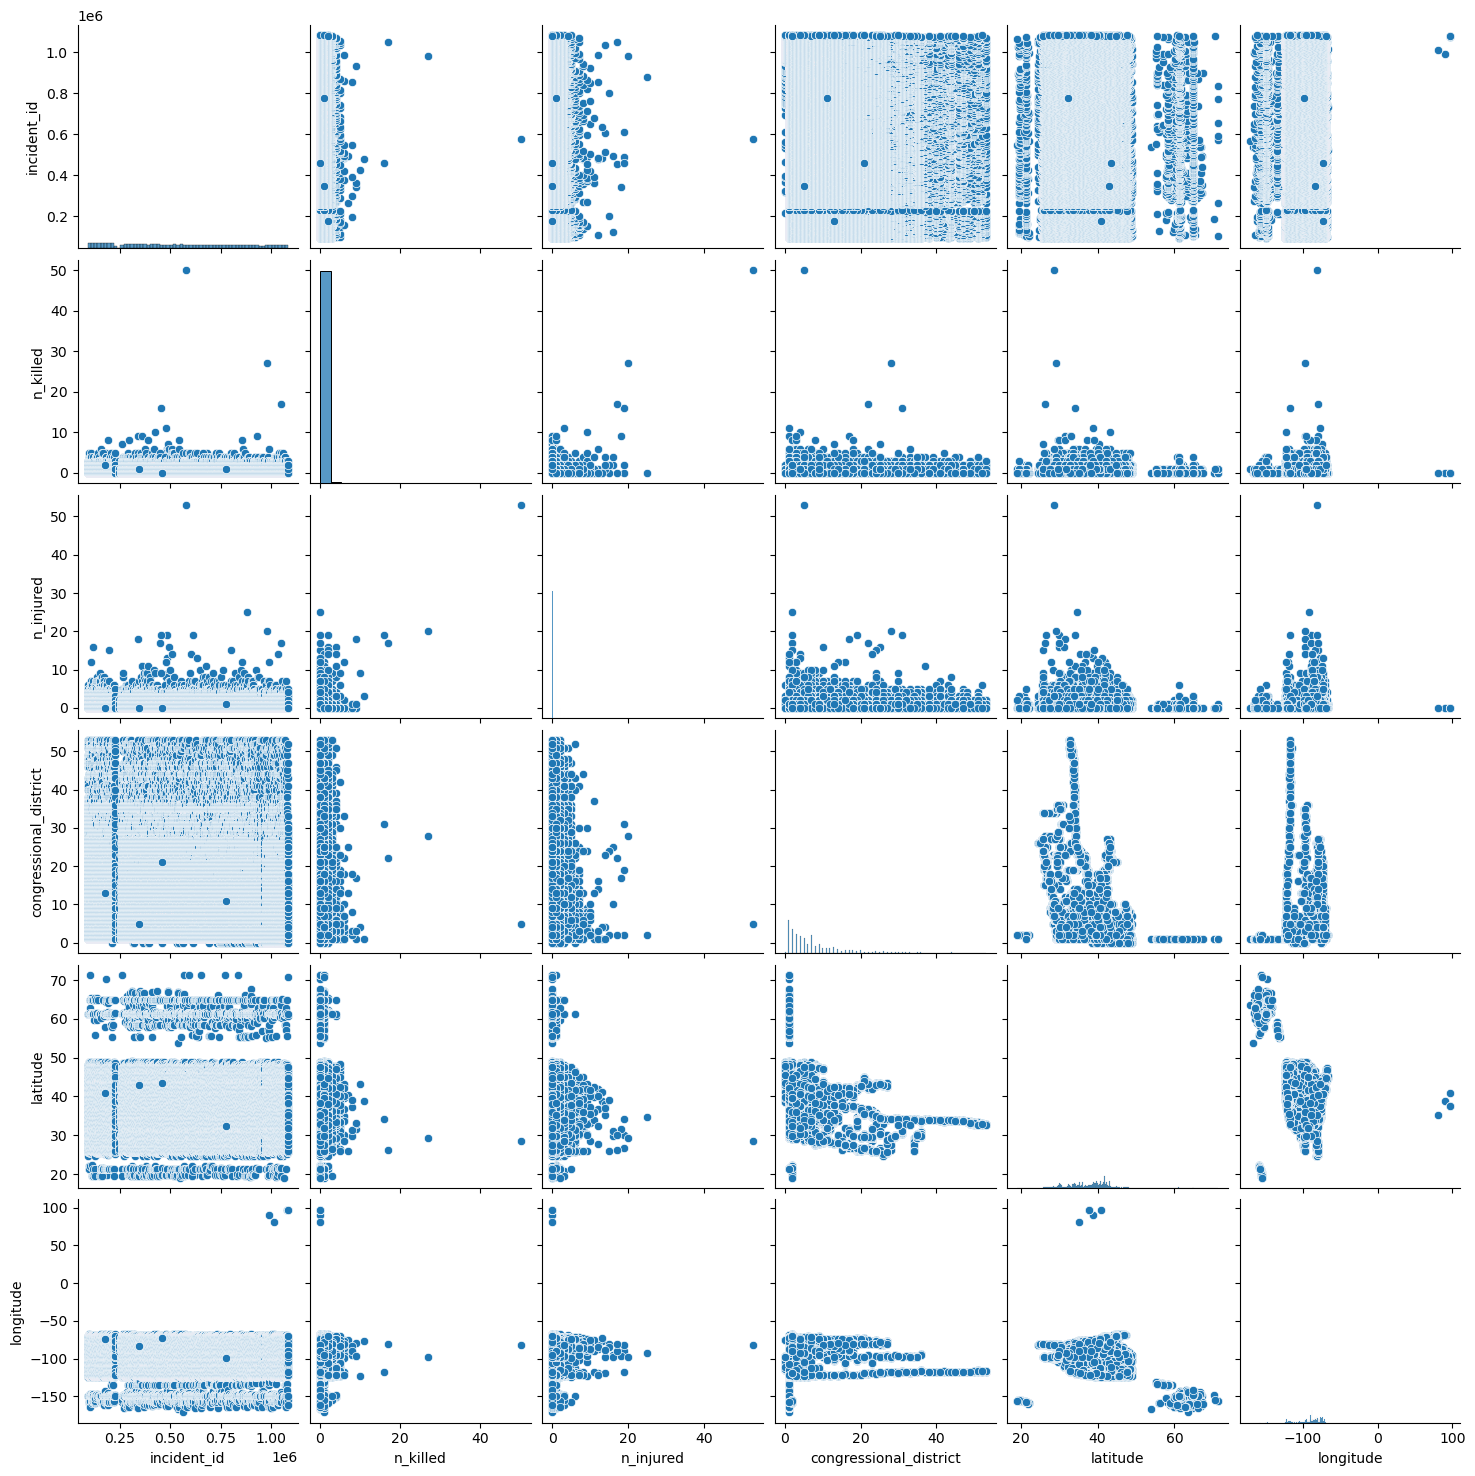

In [14]:
# Add a command to hide FutureWarning messages.
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Exploring all variables visually via scatterplot
sns.pairplot(df_gv)
plt.show()

### 4. The hypothesis: 
The number of killed from gun violence in the United States tends to rise as one moves southwards towards regions with lesser latitude.

### 5. Data prep for regression analysis

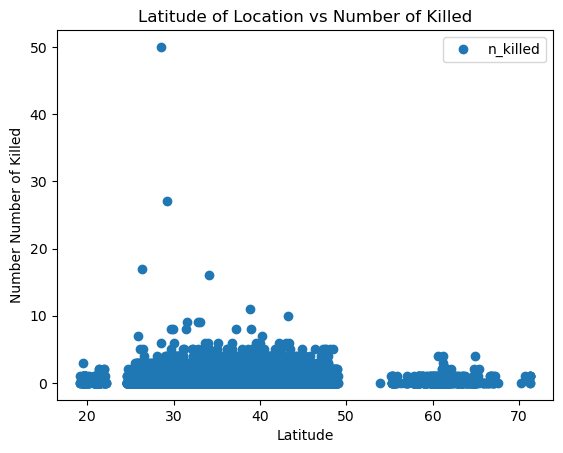

In [15]:
# Create a scatterplot using matplotlib for the columns 'latitude' and 'n_killed'

df_gv_clean.plot(x = 'latitude', y='n_killed',style='o')
plt.title('Latitude of Location vs Number of Killed')  
plt.xlabel('Latitude')  
plt.ylabel('Number Number of Killed')  
plt.show()

In [16]:
# Reshape the variables 'latitude' and 'n_killed' into NumPy arrays and put them into separate objects.
X = df_gv_clean['latitude'].values.reshape(-1,1)
y = df_gv_clean['n_killed'].values.reshape(-1,1)

In [17]:
X

array([[40.3467],
       [33.909 ],
       [41.4455],
       ...,
       [29.9239],
       [29.7201],
       [44.7293]])

In [18]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [19]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6. Regression Analysis

In [20]:
# Create a regression object.
regression = LinearRegression()  # This object will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

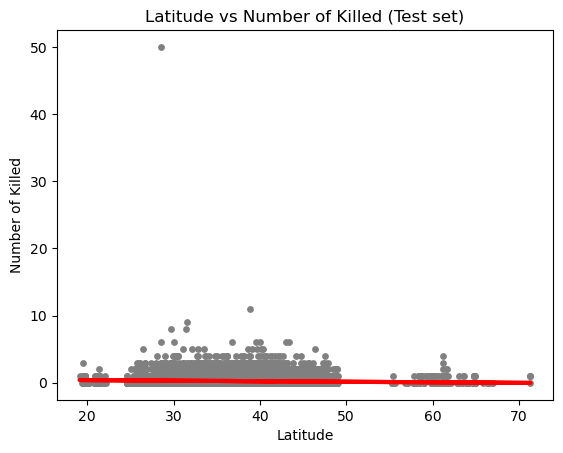

In [23]:
# Create a plot to show the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Latitude vs Number of Killed (Test set)')
plot_test.xlabel('Latitude')
plot_test.ylabel('Number of Killed')
plot_test.show()

#### The regression line on the plot shows a weak relationship between latitude and the number of fatalities from gun violence, indicating that latitude is not a significant predictor of gun violence fatalities in the test dataset. Most data points are clustered at the lower end of fatalities, suggesting that high-fatality incidents are relatively rare. The model may benefit from including additional variables to better explain the variations in gun violence incidents. The regression line does not appear to capture the complexity of the data well, indicating that a simple linear model may not be sufficient to model the relationship between latitude and gun violence fatalities.

In [24]:
#Check the model performance statistics—MSE and R2 score.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics to help us evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00815437]]
Mean squared error:  0.2890658489789503
R2 score:  0.005745120920600089


##### Compare the predicted y values with the actual y values in a dataframe


In [26]:
y_predicted

array([[0.26051452],
       [0.20765545],
       [0.26479067],
       ...,
       [0.21353067],
       [0.21535888],
       [0.21293459]])

In [27]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(40)

Actual  Predicted
0        0   0.260515
1        0   0.207655
2        1   0.264791
3        0   0.239854
4        0   0.307599
5        1   0.234978
6        1   0.298609
7        0   0.220016
8        0   0.211889
9        0   0.224440
10       0   0.225303
11       0   0.220396
12       0   0.288241
13       0   0.244606
14       0   0.213625
15       0   0.342264
16       0   0.211803
17       1   0.235307
18       1   0.273566
19       0   0.305115
20       0   0.251693
21       0   0.296818
22       1   0.265022
23       1   0.279919
24       2   0.302142
25       0   0.200361
26       0   0.261693
27       0   0.215617
28       0   0.305260
29       0   0.302493
30       0   0.283496
31       0   0.223681
32       1   0.309542
33       0   0.216602
34       0   0.230425
35       0   0.207948
36       0   0.220260
37       0   0.234610
38       0   0.240204
39       2   0.335574

### 7. My thoughts on how well the model performed on the test set:
The model summary statistics indicate that the slope of the regression line is very close to zero, which suggests a very weak negative relationship between latitude and the number of people killed in gun violence incidents. The mean squared error (MSE) is approximately 0.289, which may or may not be considered high depending on the variance of the number of people killed in the dataset and the scale of the 'number of killed' variable.

The R-squared value is approximately 0.0057, which is very low. An R-squared value ranges from 0 to 1 and represents the proportion of variance in the dependent variable that can be predicted from the independent variable(s). In this context, an R-squared value of 0.0057 means that the model explains less than 1% of the variance in the number of fatalities from gun violence based on latitude alone.

Considering the dataset's background related to gun violence in the USA, these statistics suggest that the model does not perform well and that latitude is not a good predictor of gun violence fatalities. This implies that other factors not included in the model likely have a greater impact on gun violence incidents.


In [28]:
# export df_gv_clean to pkl to save the changes
df_gv_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_gv_clean.pkl'))